In [1]:
%matplotlib inline

# Analysing structured data with data frames 

(c) 2019 [Steve Phelps](mailto:sphelps@sphelps.net)


## Data frames

- The `pandas` module provides a powerful data-structure called a data frame.

- It is similar, but not identical to:
    - a table in a relational database,
    - an Excel spreadsheet,
    - a dataframe in R.
    

### Types of data

Data frames can be used to represent:

- [Panel data](https://en.wikipedia.org/wiki/Panel_data)
- [Time series](https://en.wikipedia.org/wiki/Time_series) data
- [Relational data](https://en.wikipedia.org/wiki/Relational_model)
    

### Loading data

- Data frames can be read and written to/from:
    - financial web sites
    - database queries
    - database tables
    - CSV files
    - json files
    
- Beware that data frames are memory resident;
    - If you read a large amount of data your PC might crash
    - With big data, typically you would read a subset or summary of the data via e.g. a select statement.

## Importing pandas

- The pandas module is usually imported with the alias `pd`.


In [2]:
import pandas as pd

## Series

- A Series contains a one-dimensional array of data, *and* an associated sequence of labels called the *index*.

- The index can contain numeric, string, or date/time values.

- When the index is a time value, the series is a [time series](https://en.wikipedia.org/wiki/Time_series).

- The index must be the same length as the data.

- If no index is supplied it is automatically generated as `range(len(data))`.

### Creating a series from an array



In [3]:
import numpy as np
data = np.random.randn(5)
data

array([ 0.03245675,  0.41263151, -0.27993028, -0.95398035, -0.01473876])

In [4]:
my_series = pd.Series(data, index=['a', 'b', 'c', 'd', 'e'])
my_series

a    0.032457
b    0.412632
c   -0.279930
d   -0.953980
e   -0.014739
dtype: float64

### Plotting a series

- We can plot a series by invoking the `plot()` method on an instance of a `Series` object.

- The x-axis will autimatically be labelled with the series index.

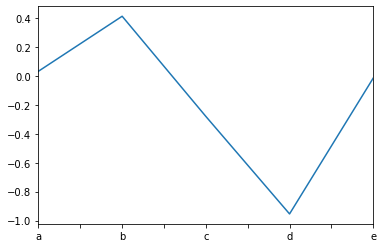

In [5]:
import matplotlib.pyplot as plt
my_series.plot()
plt.show()

### Creating a series with automatic index

- In the following example the index is creating automatically:

In [6]:
pd.Series(data)

0    0.032457
1    0.412632
2   -0.279930
3   -0.953980
4   -0.014739
dtype: float64

### Creating a Series from a `dict`



In [7]:
d = {'a' : 0., 'b' : 1., 'c' : 2.}
my_series = pd.Series(d)
my_series

a    0.0
b    1.0
c    2.0
dtype: float64

### Indexing a series with `[]`

- Series can be accessed using the same syntax as arrays and dicts.

- We use the labels in the index to access each element.



In [8]:
my_series['b']

1.0

- We can also use the label like an attribute:

In [9]:
my_series.b

1.0

### Slicing a series


- We can specify a range of labels to obtain a slice:

In [10]:
my_series[['b', 'c']]

b    1.0
c    2.0
dtype: float64

## Arithmetic and vectorised functions

- `numpy` vectorization works for series objects too.



In [11]:
d = {'a' : 0., 'b' : 1., 'c' : 2.}
squared_values = pd.Series(d) ** 2
squared_values

a    0.0
b    1.0
c    4.0
dtype: float64

In [12]:
x = pd.Series({'a' : 0., 'b' : 1., 'c' : 2.})
y = pd.Series({'a' : 3., 'b' : 4., 'c' : 5.})
x + y

a    3.0
b    5.0
c    7.0
dtype: float64

## Time series

In [13]:
dates = pd.date_range('1/1/2000', periods=5)
dates

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05'],
              dtype='datetime64[ns]', freq='D')

In [14]:
time_series = pd.Series(data, index=dates)
time_series

2000-01-01    0.032457
2000-01-02    0.412632
2000-01-03   -0.279930
2000-01-04   -0.953980
2000-01-05   -0.014739
Freq: D, dtype: float64

### Plotting a time-series

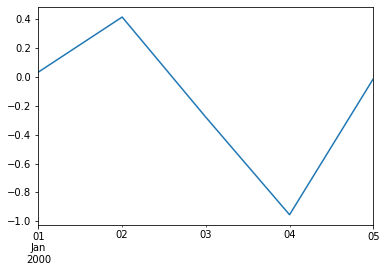

In [15]:
ax = time_series.plot()

## Missing values

- Pandas uses `nan` to represent missing data.

- So `nan` is used to represent missing, invalid or unknown data values.

- It is important to note that this only convention only applies within pandas.
    - Other frameworks have very different semantics for these values.


## DataFrame

- A data frame has multiple columns, each of which can hold a *different* type of value.

- Like a series, it has an index which provides a label for each and every row. 

- Data frames can be constructed from:
    - dict of arrays,
    - dict of lists,
    - dict of dict
    - dict of Series
    - 2-dimensional array
    - a single Series
    - another DataFrame


## Creating a dict of series

In [16]:
series_dict = {
        'x' : 
            pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
        'y' : 
            pd.Series([4., 5., 6., 7.], index=['a', 'b', 'c', 'd']),
        'z' :
            pd.Series([0.1, 0.2, 0.3, 0.4], index=['a', 'b', 'c', 'd'])
}

series_dict

{'x': a    1.0
 b    2.0
 c    3.0
 dtype: float64, 'y': a    4.0
 b    5.0
 c    6.0
 d    7.0
 dtype: float64, 'z': a    0.1
 b    0.2
 c    0.3
 d    0.4
 dtype: float64}

## Converting the dict to a data frame

In [17]:
df = pd.DataFrame(series_dict)
df

,x,y,z
a,1.0,4.0,0.1
b,2.0,5.0,0.2
c,3.0,6.0,0.3
d,NaN,7.0,0.4


## Plotting data frames

- When plotting a data frame, each column is plotted as its own series on the same graph.

- The column names are used to label each series.

- The row names (index) is used to label the x-axis.

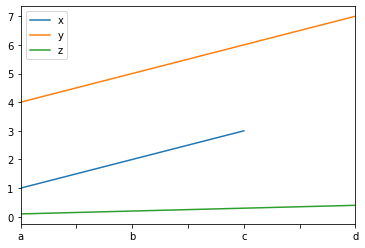

In [18]:
ax = df.plot()

## Indexing

- The outer dimension is the column index.

- When we retrieve a single column, the result is a Series

In [19]:
df['x']

a    1.0
b    2.0
c    3.0
d    NaN
Name: x, dtype: float64

In [20]:
df['x']['b']

2.0

In [21]:
df.x.b

2.0

## Projections

- Data frames can be sliced just like series.
- When we slice columns we call this a *projection*, because it is analogous to specifying a subset of attributes in a relational query, e.g. `SELECT x FROM table`.
- If we project a single column the result is a series:

In [22]:
slice = df['x'][['b', 'c']]
slice

b    2.0
c    3.0
Name: x, dtype: float64

In [23]:
type(slice)

pandas.core.series.Series

## Projecting multiple columns

- When we include multiple columns in the projection the result is a DataFrame.

In [24]:
slice = df[['x', 'y']]
slice

,x,y
a,1.0,4.0
b,2.0,5.0
c,3.0,6.0
d,NaN,7.0


In [25]:
type(slice)

pandas.core.frame.DataFrame

## Vectorization

- Vectorized functions and operators work just as with series objects:

In [26]:
df['x'] + df['y']

a    5.0
b    7.0
c    9.0
d    NaN
dtype: float64

In [27]:
df ** 2

,x,y,z
a,1.0,16.0,0.01
b,4.0,25.0,0.04
c,9.0,36.0,0.09
d,NaN,49.0,0.16


## Logical indexing

- We can use logical indexing to retrieve a subset of the data.



In [28]:
df['x'] >= 2

a    False
b     True
c     True
d    False
Name: x, dtype: bool

In [29]:
df[df['x'] >= 2]

,x,y,z
b,2.0,5.0,0.2
c,3.0,6.0,0.3


## Descriptive statistics

- To quickly obtain descriptive statistics on numerical values use the `describe` method.

In [30]:
df.describe()

,x,y,z
count,3.0,4.000000,4.000000
mean,2.0,5.500000,0.250000
std,1.0,1.290994,0.129099
min,1.0,4.000000,0.100000
25%,1.5,4.750000,0.175000
50%,2.0,5.500000,0.250000
75%,2.5,6.250000,0.325000
max,3.0,7.000000,0.400000


## Accessing a single statistic

- The result is itself a DataFrame, so we can index a particular statistic like so:

In [31]:
df.describe()['x']['mean']

2.0

## Accessing the row and column labels

- The row labels (index) and column labels can be accessed:


In [32]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [33]:
df.columns

Index(['x', 'y', 'z'], dtype='object')

## Head and tail

- Data frames have `head()` and `tail()` methods which behave analgously to the Unix commands of the same name.

## Financial data

- Pandas was originally developed to analyse financial data.

- We can download tabulated data in a portable format called [Comma Separated Values (CSV)](https://www.loc.gov/preservation/digital/formats/fdd/fdd000323.shtml).

In [34]:
import pandas as pd
googl = pd.read_csv('data/GOOGL.csv')

### Examining the first few rows

- When working with large data sets it is useful to view just the first/last few rows in the dataset.

- We can use the `head()` method to retrieve the first rows:

In [35]:
googl.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-11-13,503.878876,516.941956,503.753754,516.751770,516.751770,3155600
1,2013-11-14,517.477478,520.395386,515.690674,518.133118,518.133118,2331000
2,2013-11-15,517.952942,519.519531,515.670654,517.297302,517.297302,2550000
3,2013-11-18,518.393372,524.894897,515.135132,516.291321,516.291321,3515800
4,2013-11-19,516.376404,517.892883,512.037048,513.113098,513.113098,2260900


### Examining the last few rows

In [36]:
googl.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1505,2019-11-06,1290.089966,1292.989990,1282.270020,1291.010010,1291.010010,1231300
1506,2019-11-07,1294.280029,1322.650024,1293.750000,1306.939941,1306.939941,2257000
1507,2019-11-08,1301.520020,1317.109985,1301.520020,1309.000000,1309.000000,1519600
1508,2019-11-11,1304.000000,1304.900024,1295.869995,1298.280029,1298.280029,861700
1509,2019-11-12,1298.569946,1309.349976,1294.239990,1297.209961,1297.209961,1442600


### Converting to datetime values

- So far, the `Date` attribute is of type string.

In [37]:
googl.Date[0]

'2013-11-13'

In [38]:
type(googl.Date[0])

str

- In order to work with time-series data, we need to construct an index containing time values.

- Time values are of type `datetime` or `Timestamp`.

- We can use the function `to_datetime()` to convert strings to time values.

In [39]:
pd.to_datetime(googl['Date']).head()

0   2013-11-13
1   2013-11-14
2   2013-11-15
3   2013-11-18
4   2013-11-19
Name: Date, dtype: datetime64[ns]

### Setting the index

- Now we need to set the index of the data-frame so that it contains the sequence of dates.


In [40]:
googl.set_index(pd.to_datetime(googl['Date']), inplace=True)
googl.index[0]

Timestamp('2013-11-13 00:00:00')

In [41]:
type(googl.index[0])

pandas._libs.tslibs.timestamps.Timestamp

### Plotting series

- We can plot a series in a dataframe by invoking its `plot()` method.

- Here we plot a time-series of the daily traded volume:

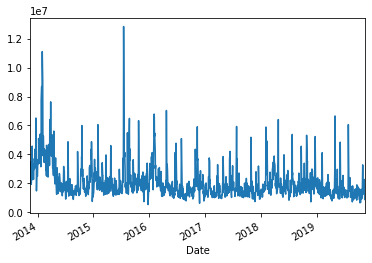

In [42]:
ax = googl['Volume'].plot()
plt.show()

### Adjusted closing prices as a time series

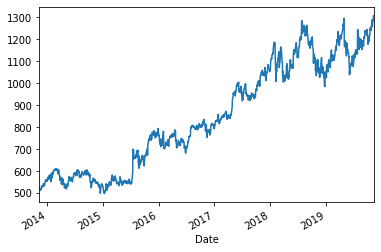

In [43]:
googl['Adj Close'].plot()
plt.show()

### Slicing series using date/time stamps

- We can slice a time series by specifying a range of dates or times.

- Date and time stamps are specified strings representing dates in the required format.

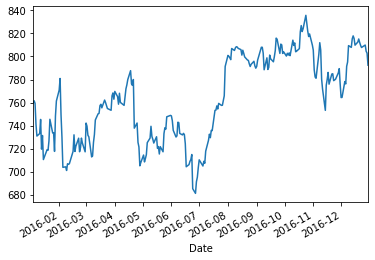

In [44]:
googl['Adj Close']['1-1-2016':'1-1-2017'].plot()
plt.show()

### Resampling 

- We can *resample* to obtain e.g. weekly or monthly prices.

- In the example below the `'W'` denotes weekly.

- See [the documentation](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases) for other frequencies.

- We group data into weeks, and then take the last value in each week.

- For details of other ways to resample the data, see [the documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html).

#### Resampled time-series plot

In [45]:
weekly_prices = googl['Adj Close'].resample('W').last()
weekly_prices.head()

Date
2013-11-17    517.297302
2013-11-24    516.461487
2013-12-01    530.325317
2013-12-08    535.470459
2013-12-15    530.925903
Freq: W-SUN, Name: Adj Close, dtype: float64

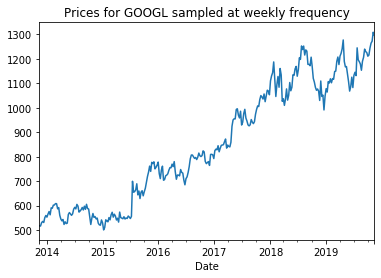

In [46]:
weekly_prices.plot()
plt.title('Prices for GOOGL sampled at weekly frequency')
plt.show()

### Converting prices to log returns

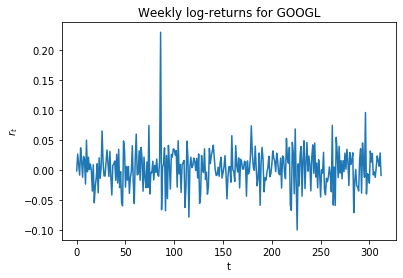

In [47]:
weekly_rets = np.diff(np.log(weekly_prices))
plt.plot(weekly_rets)
plt.xlabel('t'); plt.ylabel('$r_t$')
plt.title('Weekly log-returns for GOOGL')
plt.show()

### Converting the returns to a series

- Notice that in the above plot the time axis is missing the dates.

- This is because the `np.diff()` function returns an array instead of a data-frame.


In [48]:
type(weekly_rets)

numpy.ndarray

- We can convert it to a series thus:

In [49]:
weekly_rets_series = pd.Series(weekly_rets, index=weekly_prices.index[1:])
weekly_rets_series.head()

Date
2013-11-24   -0.001617
2013-12-01    0.026490
2013-12-08    0.009655
2013-12-15   -0.008523
2013-12-22    0.036860
Freq: W-SUN, dtype: float64

#### Plotting with the correct time axis

Now when we plot the series we will obtain the correct time axis:

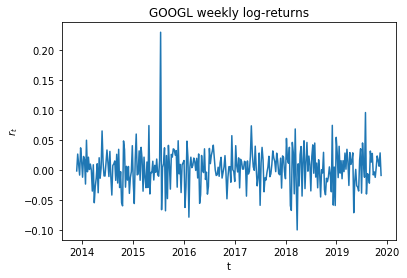

In [50]:
plt.plot(weekly_rets_series)
plt.title('GOOGL weekly log-returns'); plt.xlabel('t'); plt.ylabel('$r_t$')
plt.show()

### Plotting a return histogram

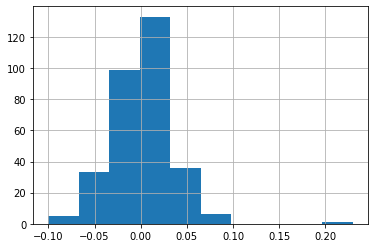

In [51]:
weekly_rets_series.hist()
plt.show()

In [52]:
weekly_rets_series.describe()

count    313.000000
mean       0.002937
std        0.032039
min       -0.099918
25%       -0.013341
50%        0.004653
75%        0.021327
max        0.229571
dtype: float64